# Jeremy Adams


## Research question/interests

What is the highest selling game on this list?

What year/platform/genre/publisher has the most selling games?

What year/platform/genre has the highest reviewing games?

How has the passing of the years affected any numerical trends?

How has the passing of the years affected the popularity of different genres?

What does this dataset have to say about Ghost Trick: Phantom Detective??

In [1]:
import pandas as pd

d = pd.read_csv("../data/raw/Video_Games.csv");


## EXPLORATORY DATA ANALYSIS ##

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,8,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,8.3,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,8,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


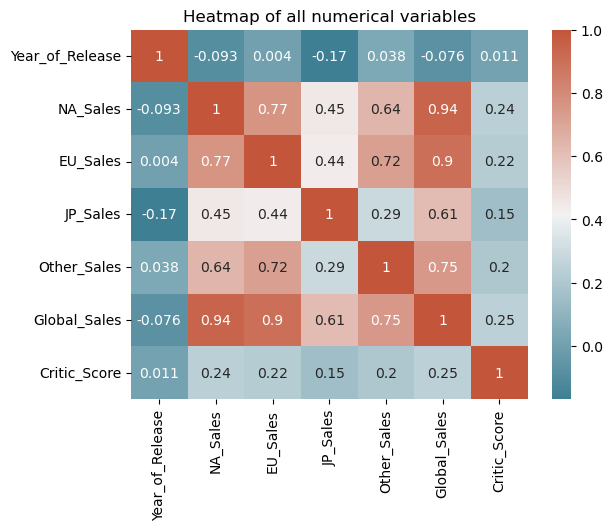

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# clean up

d_cleaned = d[d['Year_of_Release'] <= 2016] # removes outliers that have a date higher than 2016
d_cleaned = d_cleaned[d_cleaned['Global_Sales'] >= 0] # removes any potential rows that have 0 sales
d_cleaned = d_cleaned[d_cleaned['NA_Sales'] >= 0]
d_cleaned = d_cleaned[d_cleaned['EU_Sales'] >= 0]
d_cleaned = d_cleaned[d_cleaned['JP_Sales'] >= 0]
d_cleaned = d_cleaned[d_cleaned['Other_Sales'] >= 0]
d_cleaned = d_cleaned.copy().drop(['User_Count','Critic_Count', 'Rating'], axis=1) # removes User Count, Critic Count, and Rating as they aren't very important
d_cleaned = d_cleaned.dropna(subset=['Global_Sales']) # Drops any row with global sales = 0 (although there isn't any)
corr = d_cleaned.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True)).set(title="Heatmap of all numerical variables")

d_cleaned

As expected, there is a large correlation between global sales and each other region specified.

From observing this correlation chart, it seems like there is a slight scew towards NA and EU sales, with those having the largest correlation towards global sales as well as Critic Score

Interestingly, it seems like JP and NA and Global sales have a negative correlation with Year of Release. I'm not sure why this is, as I thought that games would have gotten more popular over the years. It could be because this dataset possibly doesn't include an even portion of older games and newer games?

[Text(0.5, 1.0, 'Scatterplot of Global Sales by year of release')]

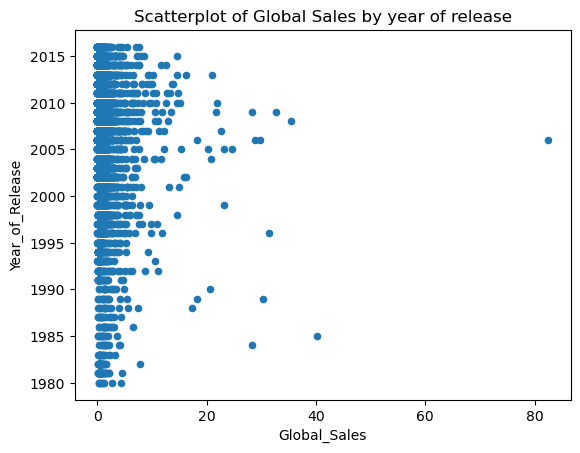

In [3]:
d_cleaned.plot(kind='scatter', x='Global_Sales', y='Year_of_Release').set(title="Scatterplot of Global Sales by year of release")


There seems to be a pretty even spread of sales over the years, with most games being in the 0 - 10 million range.

There are, however, quite a few outliers that go far beyond the expected range, especially one game in around 2006 that has sold over 80 million copies. It will be interesting to see what game that is.

[Text(0.5, 1.0, 'Countplot of amount of each genre in dataset')]

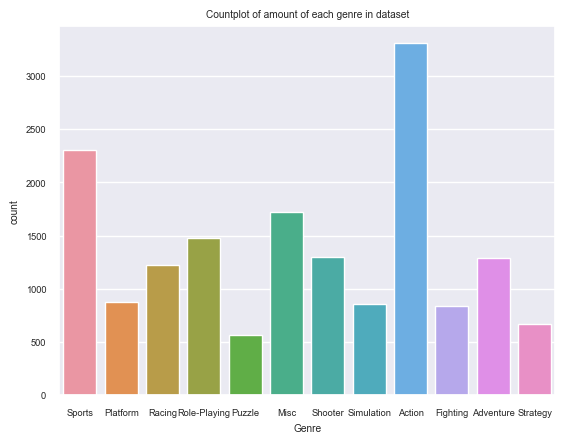

In [4]:
sns.set(font_scale=0.61)
sns.countplot(x=d_cleaned["Genre"]).set(title="Countplot of amount of each genre in dataset")

From this graph you can see the distribution of genres in the dataset.

It's interesting that Sports is so high, as I didn't think there were that many sports games.

It is, however, also a very subjective aspect of this dataset. Most of these games probably fall into more than just one category, or could arguably not even be in the category that it's listed as.

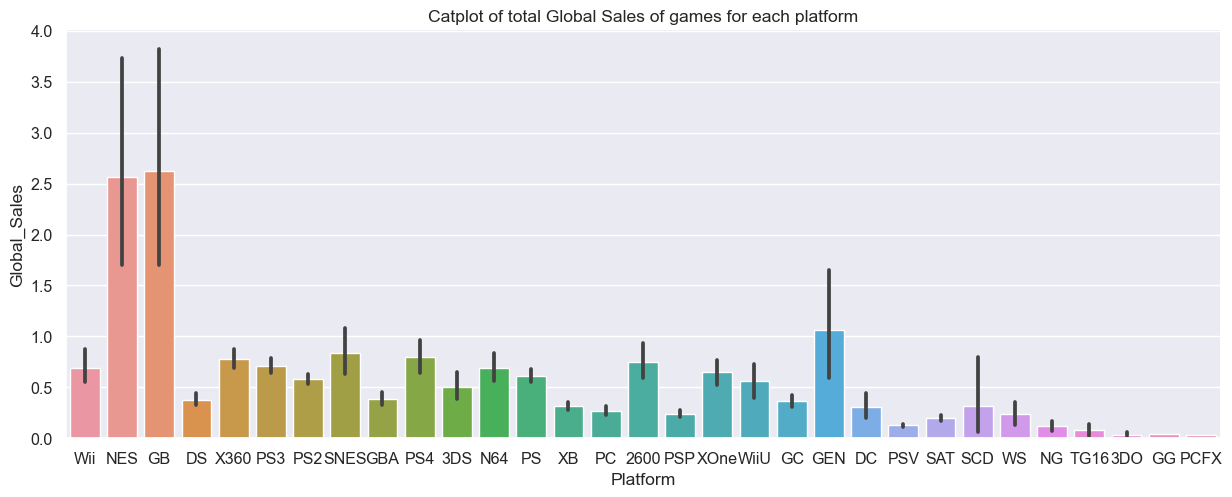

In [5]:
sns.set(font_scale=1.05)
sns.catplot(data=d_cleaned, x="Platform", y="Global_Sales", kind="bar", aspect=2.5).set(title="Catplot of total Global Sales of games for each platform") 

This graph is showing the average global sales for each platform.

It's interesting that NES and Game Boy are so high. A potential explanation is that the NES and Game Boy were selling for a much longer time than most other platforms. Especially Game Boy, which had a lifespan from 1989 to 2003.

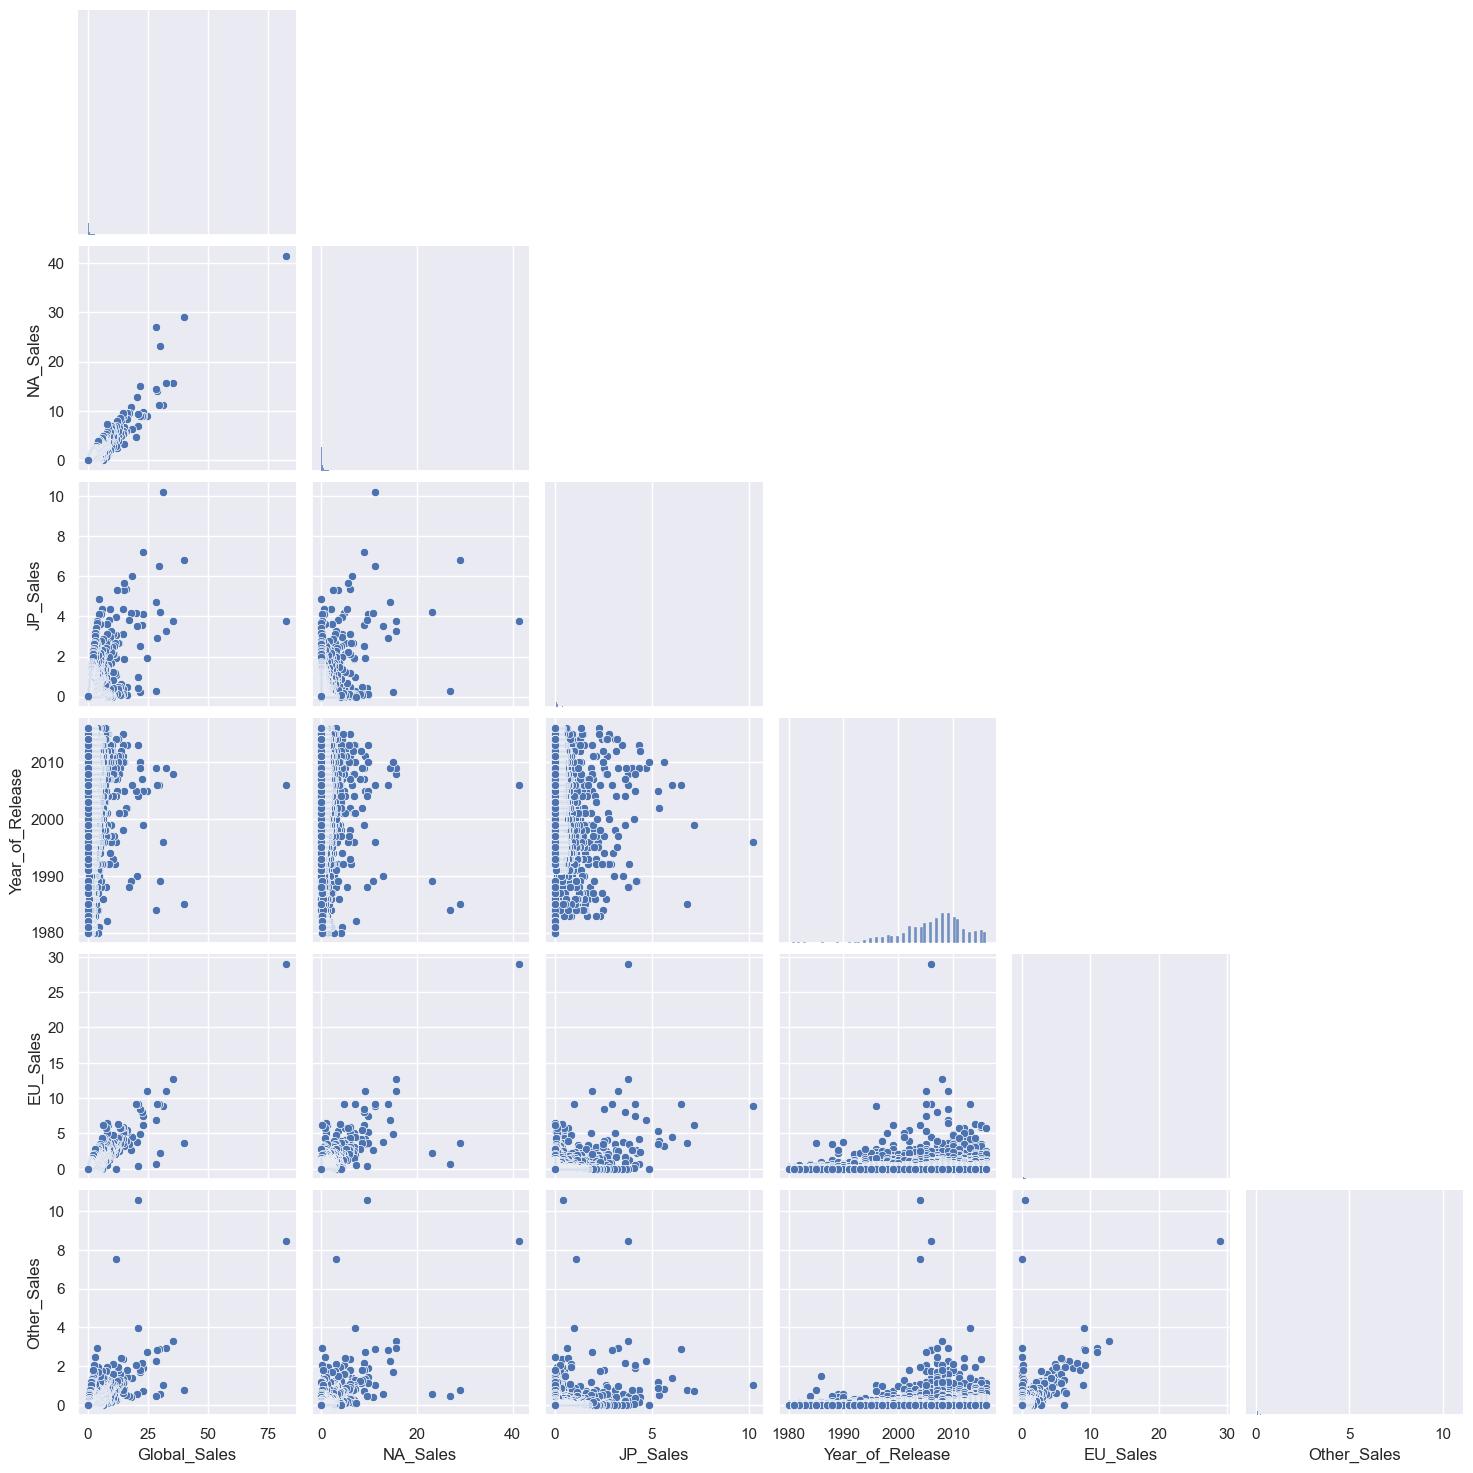

In [55]:
sns.set(font_scale=1)
sns.pairplot(d_cleaned, corner = True, vars=('Global_Sales', 'NA_Sales', 'JP_Sales', 'Year_of_Release', 'EU_Sales', 'Other_Sales'))

Here's a lot of different graphs relating each variable to eachother.

You can see that variables such as NA sales have a linear relationship with Global Sales.

[Text(0.5, 1.0, 'Histplot of amount of games in each year')]

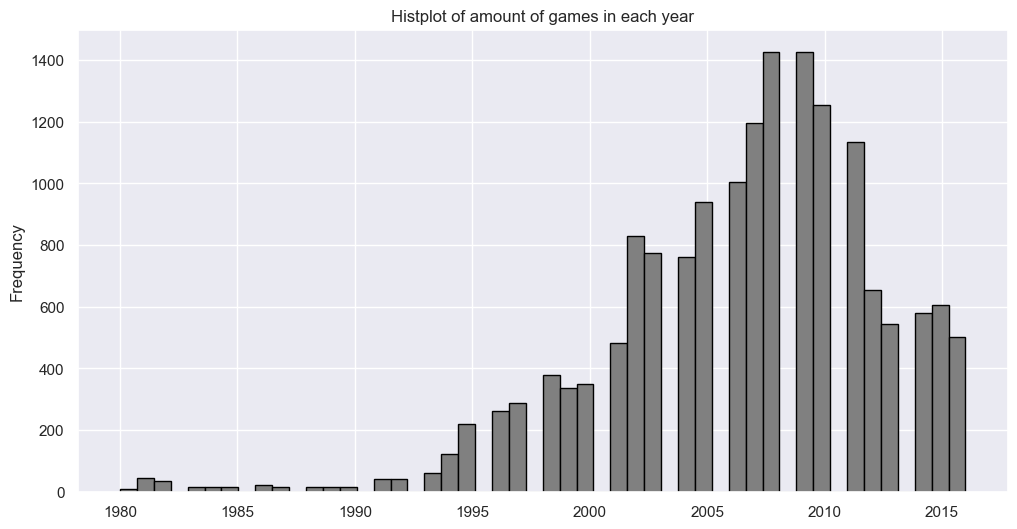

In [7]:
d_cleaned['Year_of_Release'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black').set(title="Histplot of amount of games in each year")

As predicted earlier, this dataset has a much larger number of newer games than older games. This is to be expected as games have only gotten more popular and more efficient to produce as the years have gone on.

## METHOD CHAINING

In [8]:
import pandas as pd
import numpy as np






df = (  
    pd.read_csv("../data/raw/Video_Games.csv")
    .loc[lambda x: x['Year_of_Release'] <= 2016]
    .loc[lambda x: x['Global_Sales'] >= 0]
    .loc[lambda x: x['NA_Sales'] >= 0]
    .loc[lambda x: x['JP_Sales'] >= 0]
    .loc[lambda x: x['EU_Sales'] >= 0]
    .loc[lambda x: x['Other_Sales'] >= 0]
    .drop(['User_Count','Critic_Count', 'Rating'], axis=1)
    .dropna(subset=['Global_Sales'])
)

df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,8,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,8.3,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,8,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


In [9]:
def load_and_process(path):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
        pd.read_csv(path)
        .dropna(subset=['Global_Sales'])
        .loc[lambda x: x['Year_of_Release'] <= 2016]
        .loc[lambda x: x['Global_Sales'] >= 0]
        .loc[lambda x: x['NA_Sales'] >= 0]
        .loc[lambda x: x['JP_Sales'] >= 0]
        .loc[lambda x: x['EU_Sales'] >= 0]
        .loc[lambda x: x['Other_Sales'] >= 0]
        
         
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
          .drop(['User_Count','Critic_Count', 'Rating'], axis=1)
      )

    # Make sure to return the latest dataframe

    return df2 

In [10]:
load_and_process("../data/raw/Video_Games.csv")

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,8,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,8.3,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,8,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


In [11]:
# Test import

import project_functions2

df = project_functions2.load_and_process("../data/raw/Video_Games.csv")
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,8,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,8.3,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,8,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


## RESEARCH QUESTION ANSWERS

What is the highest selling game on this list?

What year/platform/publisher/genre has the most selling games?

What year/platform/publisher/genre has the highest reviewing games?

How has the passing of the years affected any trends?

What does this dataset have to say about Ghost Trick: Phantom Detective??

 ### Question 1: What is the highest selling game on this list? ###

- To answer this question, we can simply look at the data set as it is. The dataset is alrerady ordered from most global sales to least global sales, so it's very trivial to find the highest selling game

In [12]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,8,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,8.3,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,8,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


From this dataset, you can see that the highest selling game is Wii Sports! This actually makes a lot of sense because it came packaged with basically every Wii.

### Question 2: What year/platform/publisher/genre has the most selling games? ###

- For this question, you can use catplots to see the average global sales for each variable

In [13]:
def plotGraph(xx, yy, df):

    publishers = df[xx].unique()

    biggestPublishers = {}


    for i in publishers:
        biggestPublishers[i] = df[df[xx] == i][yy].sum()

    sort = {k: v for k, v in sorted(biggestPublishers.items(), key=lambda item: item[1])}
    sort = dict(reversed(list(sort.items())))



    d = {yy: list(sort.values())[:10], xx: list(sort.keys())[:10]}
    df = pd.DataFrame(data=d)

    return sns.catplot(data=df, x=xx, y=yy, kind="bar", aspect=3.7)

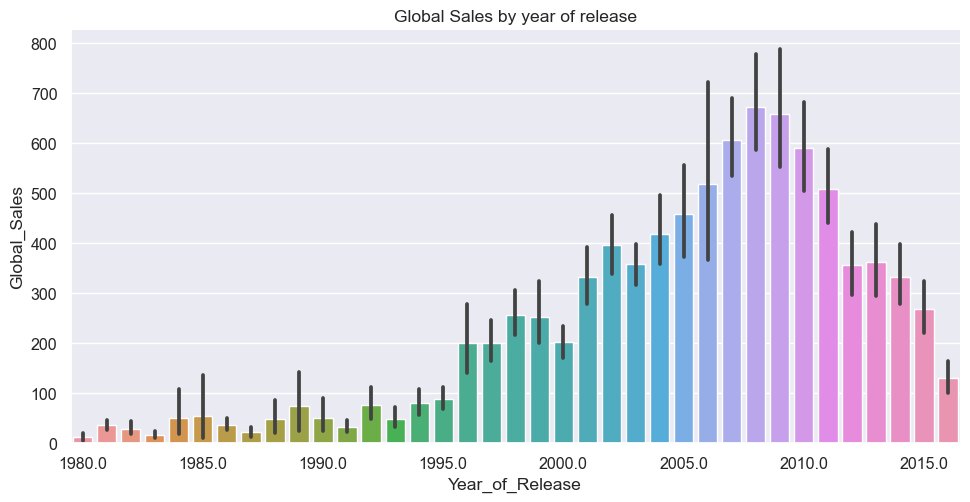

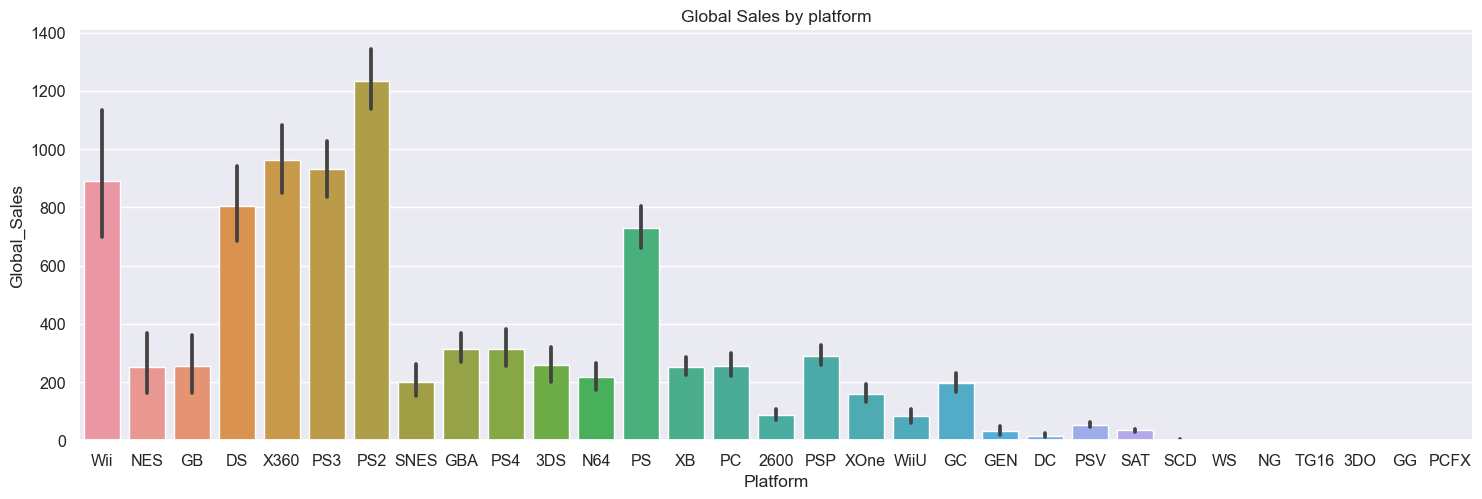

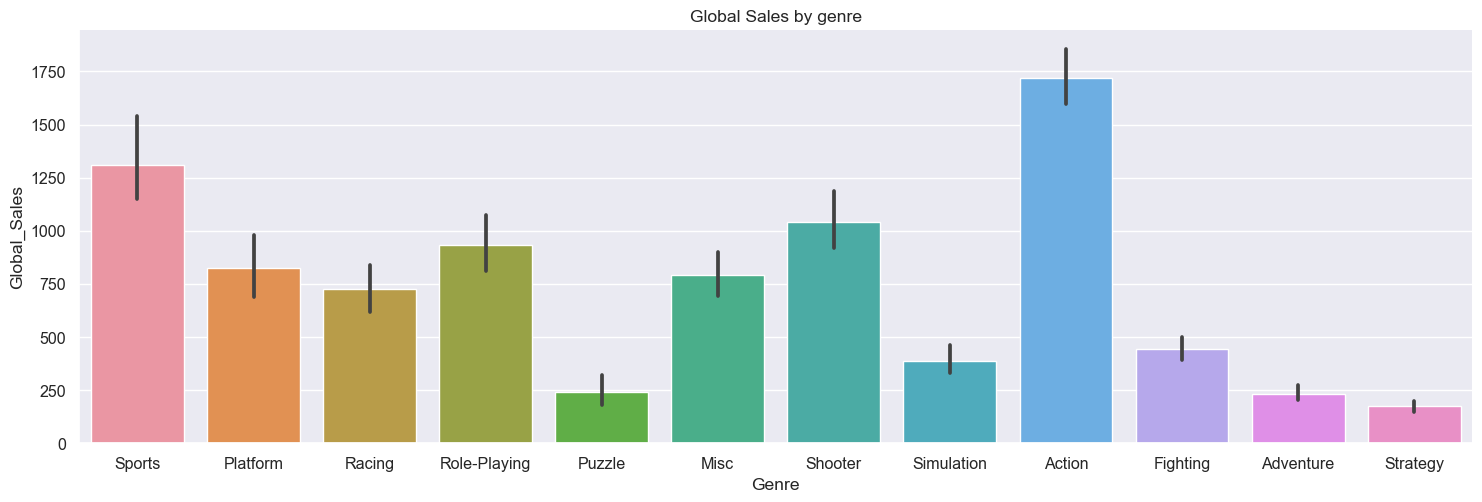

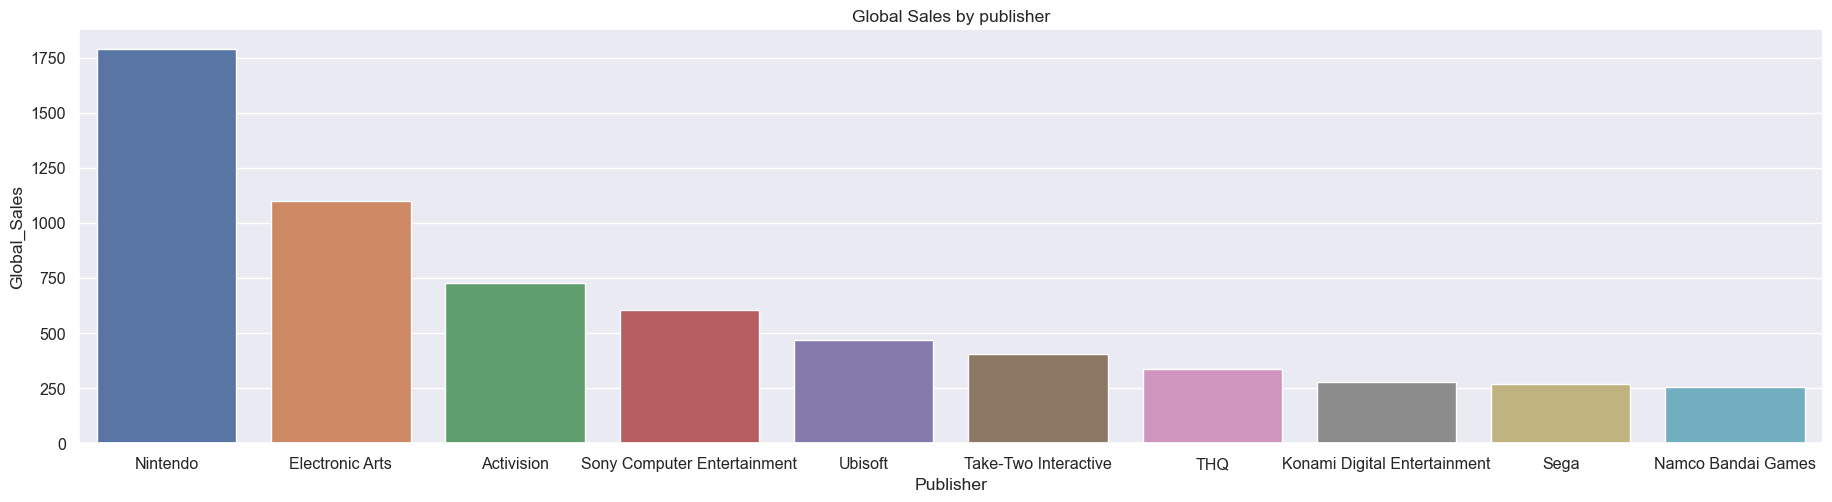

In [14]:

sns.set(font_scale=1.05)
sns.catplot(data=d_cleaned, x="Year_of_Release", y="Global_Sales", kind="bar", aspect=2, estimator = sum).set(title="Global Sales by year of release",
                                                                                                             xticks=[0, 5, 10, 15, 20, 25, 30, 35])
sns.catplot(data=d_cleaned, x="Platform", y="Global_Sales", kind="bar", aspect=3, estimator = sum).set(title="Global Sales by platform")
sns.catplot(data=d_cleaned, x="Genre", y="Global_Sales", kind="bar", aspect=3, estimator = sum).set(title="Global Sales by genre")
plotGraph('Publisher', 'Global_Sales', d_cleaned).set(title="Global Sales by publisher")

- Year: 2008
- Platform: PS2
- Genre: Action
- Publisher: Nintendo

### Question 3: What year/platform/genre has the highest reviewing games? ###

- For this question we will do the same thing as before, except this time taking the average using User Score.

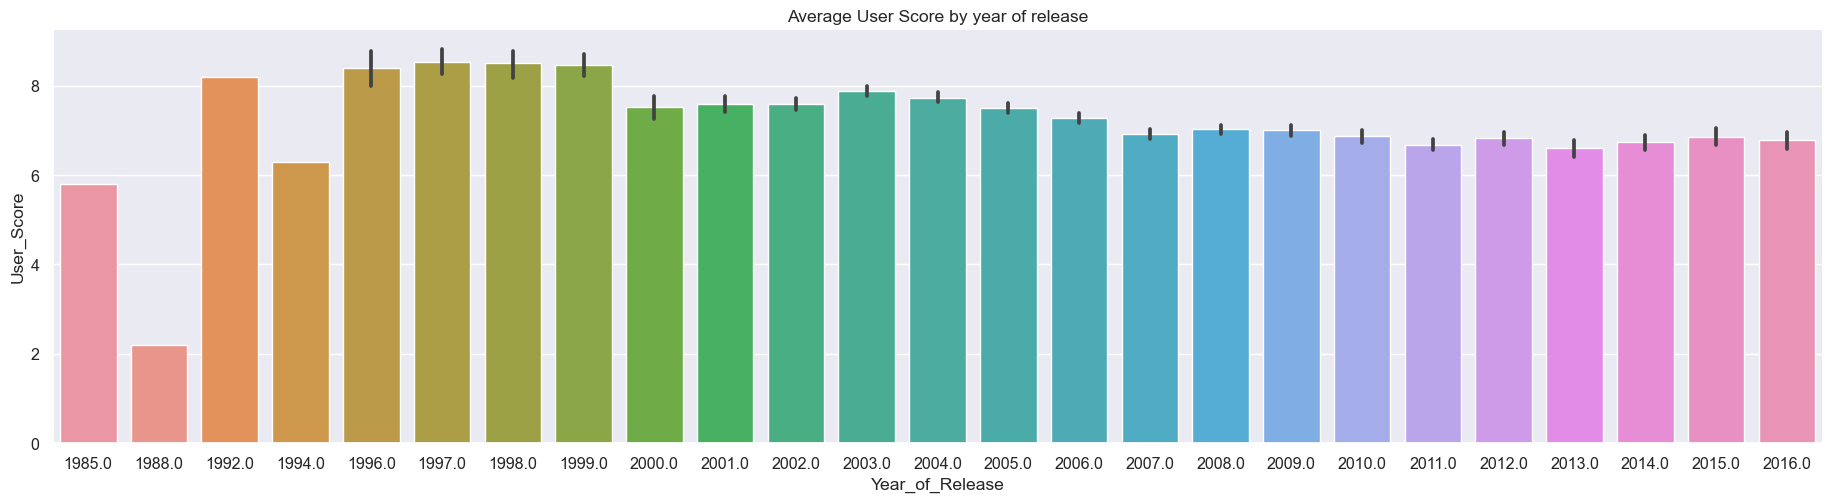

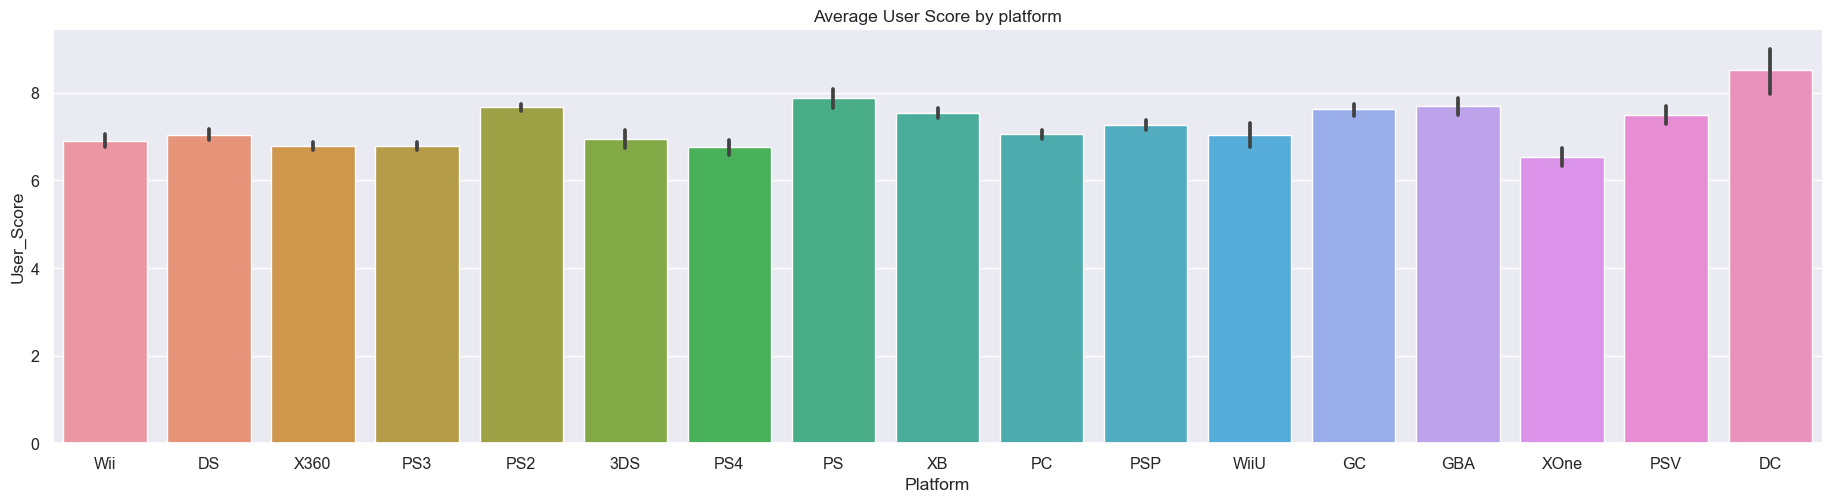

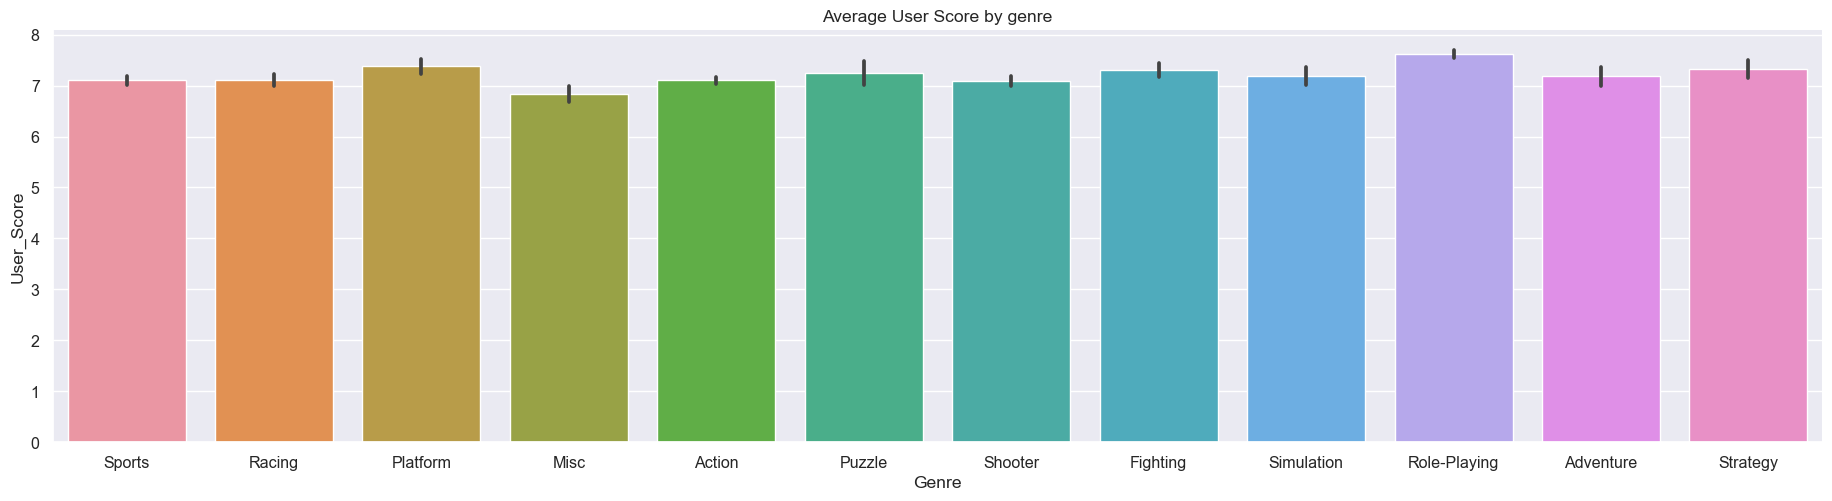

In [15]:
dtemp = d_cleaned.dropna(axis=0)
dtemp = dtemp[dtemp['User_Score'] != 'tbd']
dtemp = dtemp.astype({'User_Score':'float'})
sns.set(font_scale=1.05)
sns.catplot(data=dtemp, x="Year_of_Release", y="User_Score", kind="bar", aspect=3.7).set(title="Average User Score by year of release")
sns.catplot(data=dtemp, x="Platform", y="User_Score", kind="bar", aspect=3.7).set(title="Average User Score by platform")
sns.catplot(data=dtemp, x="Genre", y="User_Score", kind="bar", aspect=3.7).set(title="Average User Score by genre")


- Year: 1997/1998
- Platform: Dreamcast
- Genre: Role Playing


### Question 4: How has the passing of the years affected any numerical trends? ###

To figure this question out, we can look at a correlation graph that was previously made:

<AxesSubplot:>

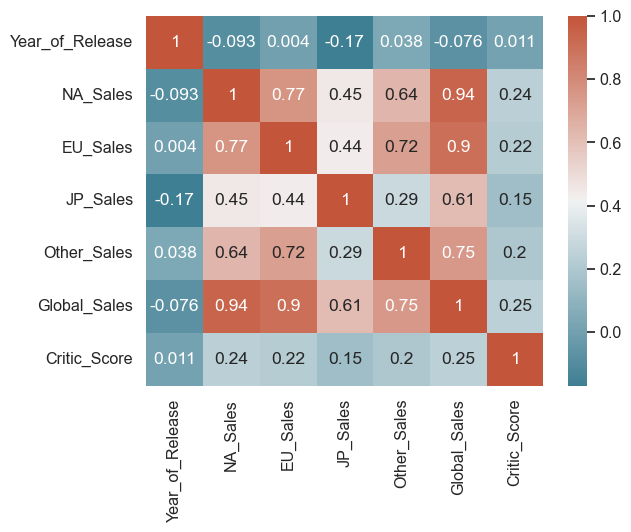

In [16]:
corr = d_cleaned.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Looking at this, we see that the passing of the years doesn't have too much of an effect on anything. It is worth noting, however, that there seems to a small negative correlation with JP Sales and the Year of Release.

### Question 5: How has the passing of the years affected the popularity of different genres? ###

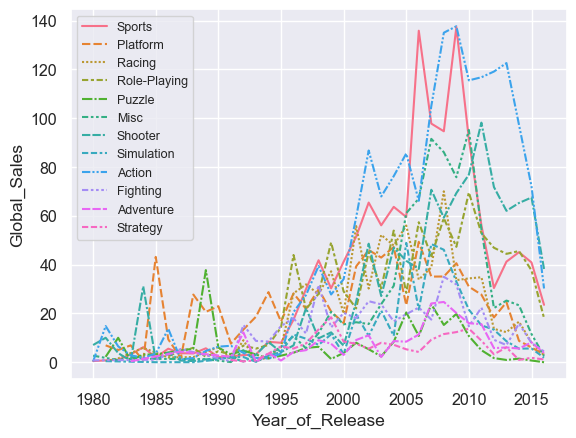

In [53]:
import matplotlib.pylab as plt
plot = sns.lineplot(d_cleaned, x='Year_of_Release', y='Global_Sales', hue='Genre', style="Genre", estimator =sum, errorbar=None)
plt.setp(plot.get_legend().get_texts(), fontsize='8') 
plot.legend(loc = 2, prop={'size':9})
plt.show()

As you can see from the lineplot above, the popularity of genres has fluctuated a lot over the years. For example, puzzle games peaked in the late 80s and never reached the same level of popularity. Or Sports and Action games started off very few and far between but spiked in popularityin the late 90s, peaking in 2008.

 ### Question 6: What does this dataset have to say about Ghost Trick: Phantom Detective?? ###


To answer this question, we simply need to search for Ghost Trick in the dataset and read the information that is displayed.

In [18]:
d_cleaned[d_cleaned["Name"] == 'Ghost Trick: Phantom Detective']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer
5019,Ghost Trick: Phantom Detective,DS,2010.0,Adventure,Capcom,0.17,0.07,0.12,0.02,0.38,83.0,9,Capcom


From this we can see that Ghost Trick is an adventure game released in 2010 for the DS. It was developed and published by Capcom, and sold 380000 units. The User Score is 9/10, and the Critic Score is 83/100.